In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_csv("/content/Titanic-Dataset.csv")

Analysing the data

In [2]:
print("The first 10 rows of the given data:")
data.head(10)

The first 10 rows of the given data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print("\n The shape of data is: ",data.shape)

print("\n The description of given data is:")
data.describe()


 The shape of data is:  (891, 12)

 The description of given data is:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above cell we can see that the age data is missing. The count of missing age data is **117**.

In [4]:
data["Survived"].value_counts()

# 0 stands for the person who are not survived.
# 1 stands for the person who are survived.

,count
Survived,
0,549
1,342


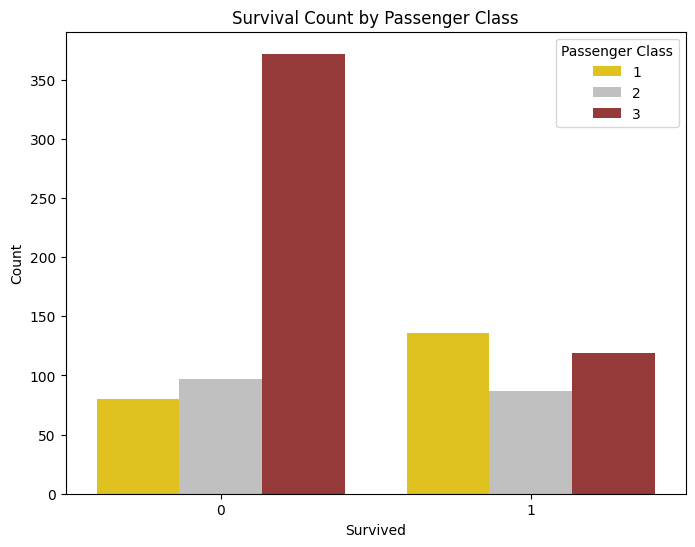

In [21]:
plt.figure(figsize=(8, 6))
sns_countplot = sns.countplot(
    x='Survived',
    hue='Pclass',
    data=data,
    palette={1: 'gold', 2: 'silver', 3: 'brown'}
)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Passenger Class')
plt.show()


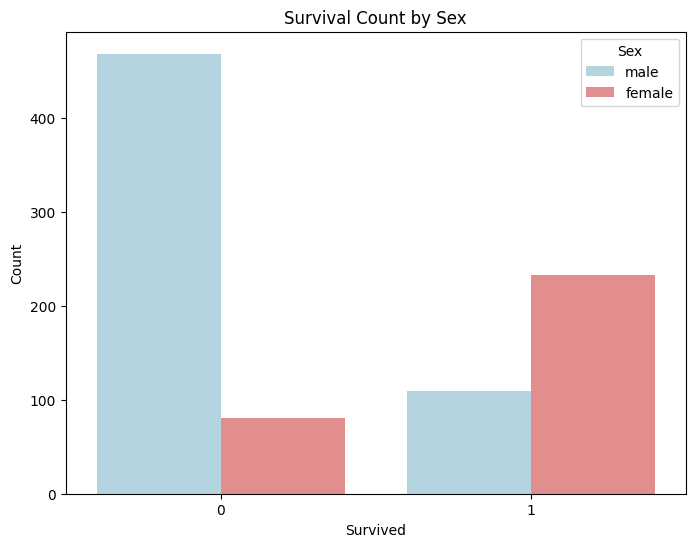

In [20]:
plt.figure(figsize=(8, 6))
sns_countplot = sns.countplot(
    x='Survived',
    hue='Sex',
    data=data,
    palette={'male': 'lightblue', 'female': 'lightcoral'}
)
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


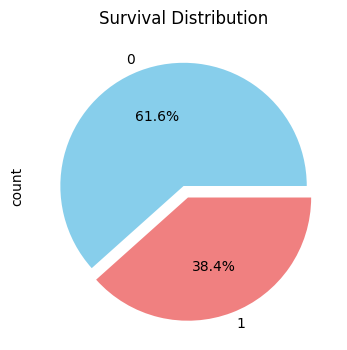

In [19]:
plt.figure(figsize=(6, 4))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=False, colors=['skyblue', 'lightcoral'])
plt.title('Survival Distribution')
plt.show()


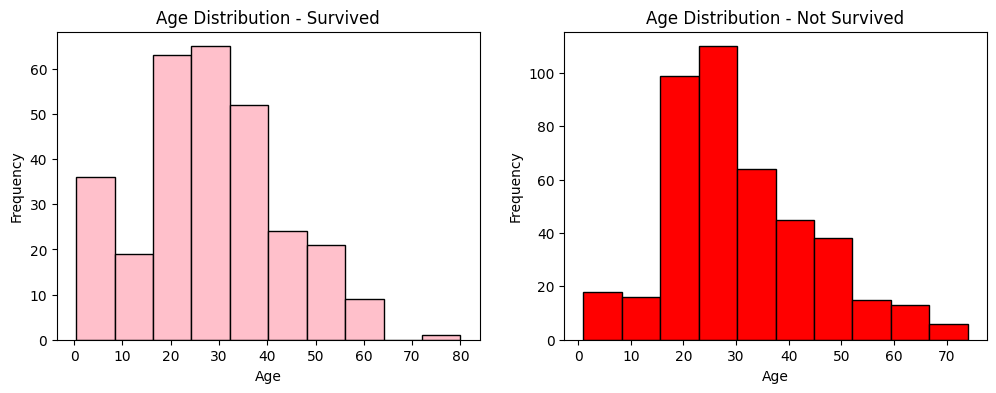

In [18]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histogram for Survived
ax[0].hist(data[data['Survived'] == 1]['Age'], bins=10, edgecolor='black', color='pink')
ax[0].set_title('Age Distribution - Survived')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

# Histogram for Not Survived
ax[1].hist(data[data['Survived'] == 0]['Age'], bins=10, edgecolor='black', color='red')
ax[1].set_title('Age Distribution - Not Survived')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')

# Show the histograms
plt.show()


In [9]:
#figuring out the total null values

data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In the above cell we can able to see that the columns Age, Cabin and Embarked contains null Values and therefore, I am not going to consider these columns for this analysis. So I am about to drop the null columns.

In [10]:
data1 = data
data1 = data1.drop(['Age'],axis=1)
data1 = data1.drop(['Cabin'],axis=1)
data1 = data1.drop(['Embarked'],axis=1)

In [11]:
#converting the sex column from string type to integer type
data['Sex'].unique()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data1['Sex']= labelencoder.fit_transform(data1['Sex'])

data1.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500



Model Training

In [12]:
X= data1[['Pclass', 'Sex']]
Y=data1['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)
LogisticRegression(random_state=0)

LogisticRegression(random_state=0)

Model Predction

In [13]:
pred = print(log.predict(X_test))

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [14]:
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [15]:
import warnings
warnings.filterwarnings("ignore")

res= log.predict([[3,0]])

if(res==0):
  print("So Sorry! Not Survived")
else:
  print("Survived")

Survived
